In [1]:
#Importing required Python packages 
import matplotlib.pylab as plt 
import numpy as np 
import torch
import torch.nn as nn
import torch.nn.functional as F

%matplotlib tk

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
# noise = np.random.normal(0,0.02, x.shape)
# x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [3]:
xy  = np.c_[x,y]

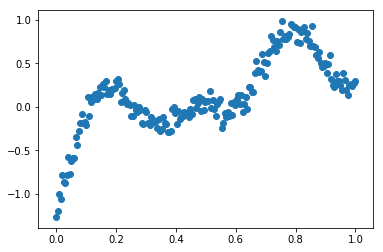

In [4]:
%matplotlib inline
plt.scatter(x, y)

In [24]:
# define parameters
hid1 = 6
init = nn.init.xavier_uniform_
W1 = torch.empty(1, hid1, requires_grad=True)
b1 = torch.zeros(hid1, requires_grad=True)
init(W1)
W2 = torch.empty(hid1, 1, requires_grad=True)
b2 = torch.zeros(1, requires_grad=True)
init(W2)

def forward(x):
    x = x.view((-1, 1))
    z1 = x.mm(W1) + b1
    a1 = F.relu(z1)

    z2 = a1.mm(W2) + b2
    return a1, z2

params = [W1, b1, W2, b2]
optimizer = torch.optim.Adam(params, lr=0.01)

dt = torch.float32
X_data = torch.from_numpy(x).type(dt)
Y_data = torch.from_numpy(y).type(dt)

In [25]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(1000000):
    a1, pred = forward(X_data)

    optimizer.zero_grad()
    loss = F.mse_loss(pred, Y_data)
    loss.backward()
    optimizer.step()

    if step % 1000 == 0:

        print('_______________________')
        print("epoch", step)

        print("Weight 1", '\n', W1.data)
        print("Biases 1", '\n', b1.data)
        print("Weight 2", '\n', W2.data)
        print("Biases 2", '\n', b2.data)
        # print("Linearity\n", v1.eval())

        losses = float(loss)
        print("Loss", losses)

        # print('sorted ', sess.run(a1z, feed_dict={xs: x_data, ys: y_data}))

        ax.clear()
        ax.scatter(x, y, marker='.', c='g')
        ax.plot(x, pred.data.numpy(), 'r', lw=5)
        for out in a1.data.numpy().T:
            ax.plot(x, out, 'b', lw=2)

        fig.canvas.draw()
        plt.pause(0.001)
        print("\n")
        if losses < 0.0025:
            plt.pause(50)
            break

_______________________
epoch 0
Weight 1 
 tensor([[ 0.3365,  0.5665, -0.9162, -0.5654,  0.7905, -0.7600]])
Biases 1 
 tensor([ 0.0100, -0.0100,  0.0000,  0.0000,  0.0100,  0.0000])
Weight 2 
 tensor([[ 0.1571],
        [-0.3006],
        [-0.5736],
        [-0.2741],
        [ 0.1199],
        [ 0.3138]])
Biases 2 
 tensor([0.0100])
Loss 0.2140427976846695


_______________________
epoch 1000
Weight 1 
 tensor([[ 0.9194,  2.1572, -0.9162, -0.5654,  1.4031, -0.7600]])
Biases 1 
 tensor([ 3.7152e-04, -1.8219e+00,  0.0000e+00,  0.0000e+00,  2.2273e-03,
         0.0000e+00])
Weight 2 
 tensor([[ 0.6347],
        [-2.0183],
        [-0.5736],
        [-0.2741],
        [ 0.5417],
        [ 0.3138]])
Biases 2 
 tensor([-0.4813])
Loss 0.07019134610891342


_______________________
epoch 2000
Weight 1 
 tensor([[ 0.9209,  2.2858, -0.9162, -0.5654,  1.4047, -0.7600]])
Biases 1 
 tensor([ 1.4150e-03, -1.9503e+00,  0.0000e+00,  0.0000e+00,  3.3399e-03,
         0.0000e+00])
Weight 2 
 tensor([[ 0

_______________________
epoch 22000
Weight 1 
 tensor([[ 0.9455,  2.3103, -0.9162, -0.5654,  1.4214, -0.7600]])
Biases 1 
 tensor([ 0.0136, -1.9712,  0.0000,  0.0000,  0.0094,  0.0000])
Weight 2 
 tensor([[ 0.5970],
        [-2.1282],
        [-0.5736],
        [-0.2741],
        [ 0.5510],
        [ 0.3138]])
Biases 2 
 tensor([-0.4949])
Loss 0.07008922845125198


_______________________
epoch 23000
Weight 1 
 tensor([[ 0.9469,  2.3120, -0.9162, -0.5654,  1.4223, -0.7600]])
Biases 1 
 tensor([ 0.0112, -1.9726,  0.0000,  0.0000,  0.0065,  0.0000])
Weight 2 
 tensor([[ 0.5946],
        [-2.1267],
        [-0.5736],
        [-0.2741],
        [ 0.5517],
        [ 0.3138]])
Biases 2 
 tensor([-0.4919])
Loss 0.07008922845125198


_______________________
epoch 24000
Weight 1 
 tensor([[ 0.9479,  2.3134, -0.9162, -0.5654,  1.4230, -0.7600]])
Biases 1 
 tensor([ 0.0091, -1.9738,  0.0000,  0.0000,  0.0041,  0.0000])
Weight 2 
 tensor([[ 0.5927],
        [-2.1257],
        [-0.5736],
        [-

_______________________
epoch 45000
Weight 1 
 tensor([[ 0.9676,  2.3436, -0.9162, -0.5654,  1.4401, -0.7600]])
Biases 1 
 tensor([ 0.0156, -1.9997,  0.0000,  0.0000,  0.0054,  0.0000])
Weight 2 
 tensor([[ 0.5538],
        [-2.0985],
        [-0.5736],
        [-0.2741],
        [ 0.5638],
        [ 0.3138]])
Biases 2 
 tensor([-0.4933])
Loss 0.07008923590183258


_______________________
epoch 46000
Weight 1 
 tensor([[ 0.9680,  2.3456, -0.9162, -0.5654,  1.4406, -0.7600]])
Biases 1 
 tensor([ 0.0123, -2.0003,  0.0000,  0.0000,  0.0022,  0.0000])
Weight 2 
 tensor([[ 0.5515],
        [-2.0981],
        [-0.5736],
        [-0.2741],
        [ 0.5641],
        [ 0.3138]])
Biases 2 
 tensor([-0.4913])
Loss 0.07009191811084747


_______________________
epoch 47000
Weight 1 
 tensor([[ 0.9688,  2.3459, -0.9162, -0.5654,  1.4415, -0.7600]])
Biases 1 
 tensor([ 1.1465e-02, -2.0016e+00,  0.0000e+00,  0.0000e+00,  1.4116e-03,
         0.0000e+00])
Weight 2 
 tensor([[ 0.5507],
        [-2.0959

_______________________
epoch 68000
Weight 1 
 tensor([[ 0.9800,  2.3746, -0.9162, -0.5654,  1.4599, -0.7600]])
Biases 1 
 tensor([ 0.0077, -2.0261,  0.0000,  0.0000,  0.0103,  0.0000])
Weight 2 
 tensor([[ 0.5143],
        [-2.0705],
        [-0.5736],
        [-0.2741],
        [ 0.5779],
        [ 0.3138]])
Biases 2 
 tensor([-0.4916])
Loss 0.07008923590183258


_______________________
epoch 69000
Weight 1 
 tensor([[ 0.9805,  2.3766, -0.9162, -0.5654,  1.4612, -0.7600]])
Biases 1 
 tensor([ 0.0043, -2.0278,  0.0000,  0.0000,  0.0076,  0.0000])
Weight 2 
 tensor([[ 0.5121],
        [-2.0688],
        [-0.5736],
        [-0.2741],
        [ 0.5787],
        [ 0.3138]])
Biases 2 
 tensor([-0.4882])
Loss 0.07008923590183258


_______________________
epoch 70000
Weight 1 
 tensor([[ 0.9807,  2.3774, -0.9162, -0.5654,  1.4618, -0.7600]])
Biases 1 
 tensor([ 0.0024, -2.0285,  0.0000,  0.0000,  0.0062,  0.0000])
Weight 2 
 tensor([[ 0.5109],
        [-2.0681],
        [-0.5736],
        [-

TclError: this isn't a Tk application